# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
df=pd.read_csv(r"C:\Users\Mario\Documents\Labs\Module3\Lab_9_Unsupervised-Learning\data\Wholesale customers data.csv")
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
Info: None
Missing data:
 Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64
Values Channel                 0.468052
Region                  0.774272
Fresh               12647.328865
Milk                 7380.377175
Grocery              9503.162829
Frozen              

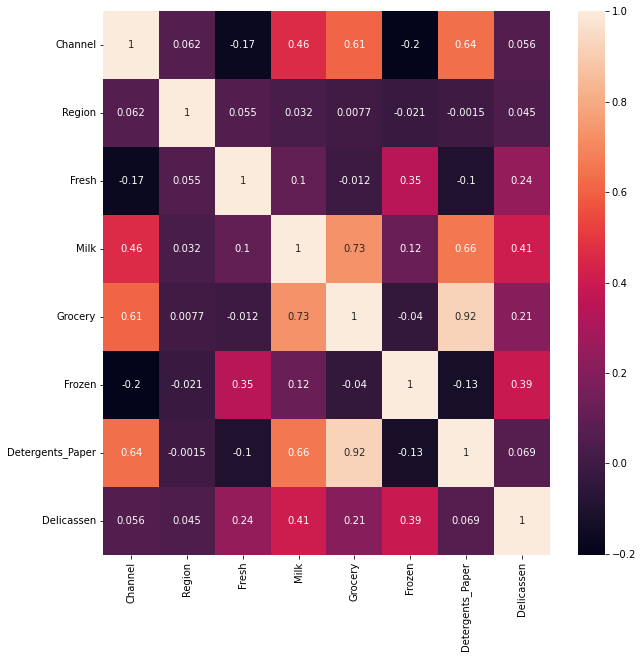

In [3]:
print('Info:',df.info())
print('Missing data:\n',df.isna().sum())
print('Values', df.std())
fig=plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
skewness=df.skew
print(skewness)

<AxesSubplot:>

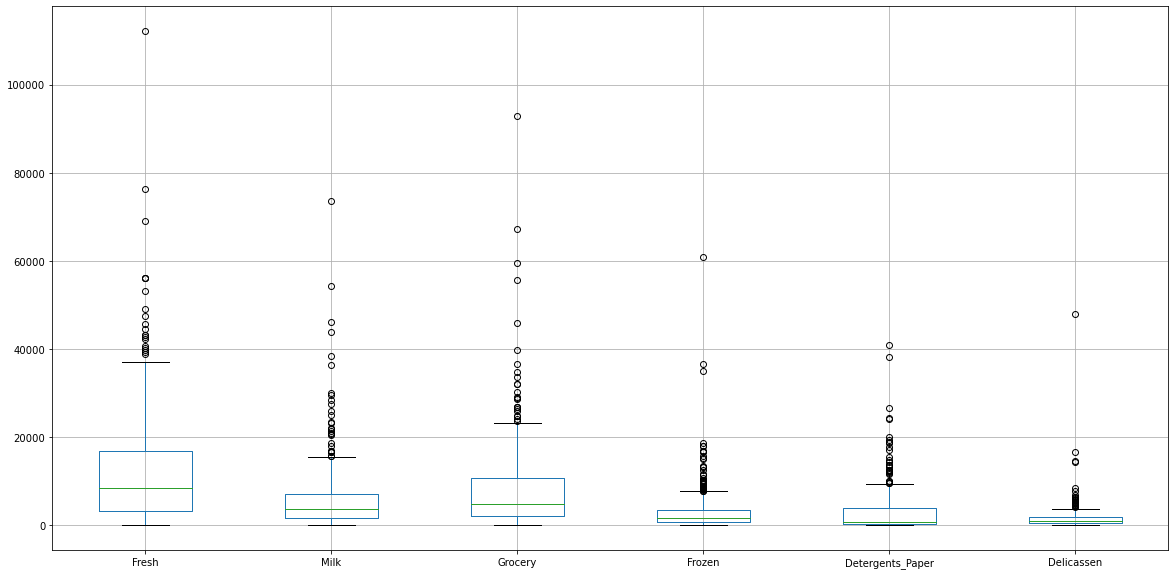

In [4]:
df.boxplot(column=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen'], figsize=(20,10))

In [5]:
# Channel and Region are catigorical data, the rest is numerical data
# - no conversion needed, as all datas are numbers and are integers
# - there are no empty values
# - there is corr. between Channel/Detergent, Channel/Grocery, Channel/Delicatesse and Grocery/Detergent 
# -CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
# -REGION: customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal) 

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [6]:
from scipy import stats
Q1, Q3 = np.percentile(df,[25,75])
Q1,Q3



# lower_bound = q1 -(1.5 * iqr)
# upper_bound = q3 +(1.5 * iqr)
# df = df[~((df < (q1 - 1.5 * iqr)) |(df > (q3 + 1.5 * iqr))).any(axis=1)]
# z = np.abs(stats.zscore(df))
# df = df[(z < 3).all(axis=1)]
# df

(3.0, 4768.0)

In [8]:
IQR = Q3 - Q1
IQR

4765.0

In [10]:
lower_bound = Q1 -(1.5 * IQR)
upper_bound = Q3 +(1.5 * IQR)


In [11]:
upper_bound

11915.5

In [12]:
df.Channel.value_counts()

1    298
2    142
Name: Channel, dtype: int64

In [13]:
df.Region.value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

In [14]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
print(df)

Channel                 1.00
Region                  1.00
Fresh               13806.00
Milk                 5657.25
Grocery              8502.75
Frozen               2812.00
Detergents_Paper     3665.25
Delicassen           1412.00
dtype: float64
     Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  1

In [16]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [17]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
3,1,3,13265,1196,4221,6404,507,1788
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
...,...,...,...,...,...,...,...,...
432,1,3,21117,1162,4754,269,1328,395
433,1,3,1982,3218,1493,1541,356,1449
434,1,3,16731,3922,7994,688,2371,838
438,1,3,10290,1981,2232,1038,168,2125


In [ ]:
#the data has alot of outliers, but its due the channel it was bought from, so the outliers should be kept. No cleaning needed.
#also no transformation is needed, as all data is only numbers and integers


# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [18]:
# Your import here:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# features = df
# autoscaler = StandardScaler()
# customers_scale = autoscaler.fit_transform(features)
# customers_scale
#customers_scale.boxplot(column=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen'], figsize=(20,10))

standardscaler = StandardScaler().fit(df)
customers_scale = standardscaler.transform(df)

# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [19]:
from sklearn.cluster import KMeans
kmeans = KMeans()
kmeans.fit(customers_scale)
print(kmeans.labels_)
df['labels_KMean'] = kmeans.labels_


[6 6 0 6 1 6 3 5 1 3 6 1 6 3 1 6 3 6 3 1 3 3 4 3 7 7 3 1 1 4 1 1 5 1 0 3 1
 7 3 1 3 3 1 1 5 0 3 1 0 3 6 7 0 3 3 3 1 6 7 1 4 3 1 3 1 3 3 0 6 5 1 3 3 1
 5 1 3 5 7 7 3 3 3 7 0 7 3 3 1 7 6 3 0 3 3 3 3 3 0 3 4 3 4 4 7 3 3 3 0 7 3
 3 7 3 3 6 7 1 1 6 4 7 1 5 6 3 3 3 1 3 3 1 4 3 0 4 1 3 3 3 0 1 5 0 3 3 1 3
 1 2 2 2 2 2 1 2 2 2 2 1 5 2 2 2 2 0 0 2 2 6 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2
 5 2 2 2 0 2 0 4 7 2 0 2 0 2 2 5 5 4 5 2 0 2 2 7 3 3 4 0 6 3 6 3 3 3 3 0 5
 4 1 7 1 1 3 6 5 1 1 5 2 3 7 0 2 5 2 2 2 3 2 7 2 7 0 3 0 0 4 6 2 1 6 3 3 3
 1 6 3 3 3 5 0 3 7 1 3 7 3 3 3 3 6 3 3 7 3 6 3 3 1 3 1 7 4 0 3 3 7 3 3 0 3
 3 3 3 6 0 0 3 0 7 7 7 3 5 1 3 3 0 6 1 1 5 3 1 6 7 1 1 6 3 4 4 7 3 3 4 3]


C:\Users\Mario\AppData\Local\Temp\ipykernel_23484\797293932.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['labels_KMean'] = kmeans.labels_


Count the values in `labels`.

In [20]:
df['labels_KMean'].value_counts()


3    103
1     50
2     48
0     34
7     31
6     28
5     20
4     18
Name: labels_KMean, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [21]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5).fit(customers_scale)


Count the values in `labels_DBSCAN`.

In [22]:
dbscan = dbscan.fit(customers_scale)
df['labels_DBSCAN'] = dbscan.labels_
df['labels_DBSCAN'].value_counts()


C:\Users\Mario\AppData\Local\Temp\ipykernel_23484\3489585760.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['labels_DBSCAN'] = dbscan.labels_


-1    308
 0     24
Name: labels_DBSCAN, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

<AxesSubplot:xlabel='Detergents_Paper', ylabel='Milk'>

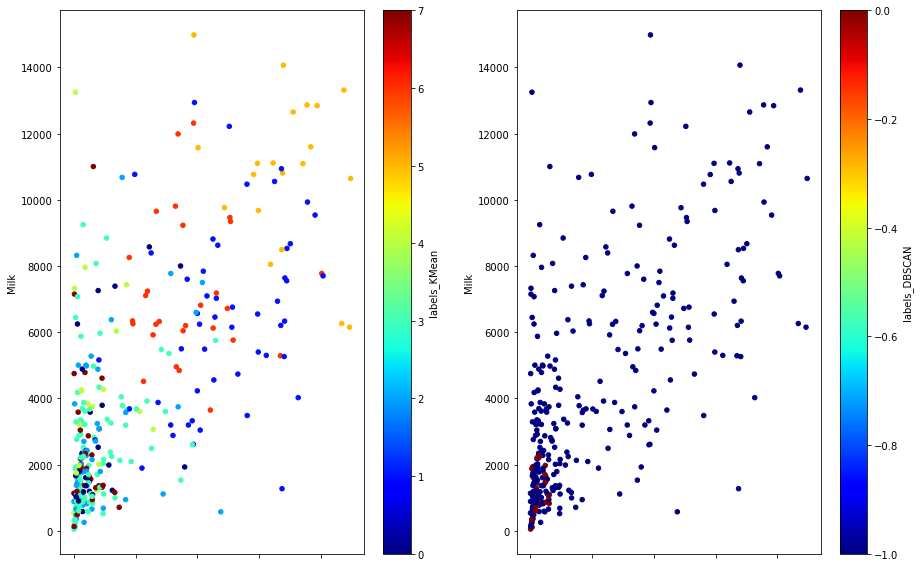

In [23]:
f, axes = plt.subplots(1, 2, figsize=(15, 10), sharex=True)
df.plot.scatter(x='Detergents_Paper',y='Milk',c='labels_KMean',colormap='jet',ax=axes[0])
df.plot.scatter(x='Detergents_Paper',y='Milk',c='labels_DBSCAN',colormap='jet',ax=axes[1])


Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

<AxesSubplot:xlabel='Grocery', ylabel='Fresh'>

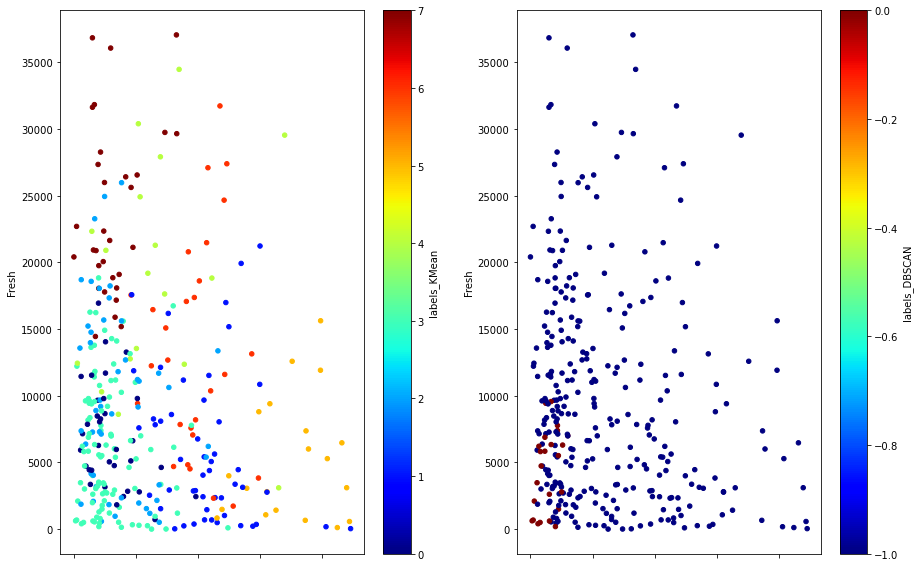

In [24]:
f, axes = plt.subplots(1, 2, figsize=(15, 10), sharex=True)
df.plot.scatter(x='Grocery',y='Fresh',c='labels_KMean',colormap='jet',ax=axes[0])
df.plot.scatter(x='Grocery',y='Fresh',c='labels_DBSCAN',colormap='jet',ax=axes[1])

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

<AxesSubplot:xlabel='Frozen', ylabel='Delicassen'>

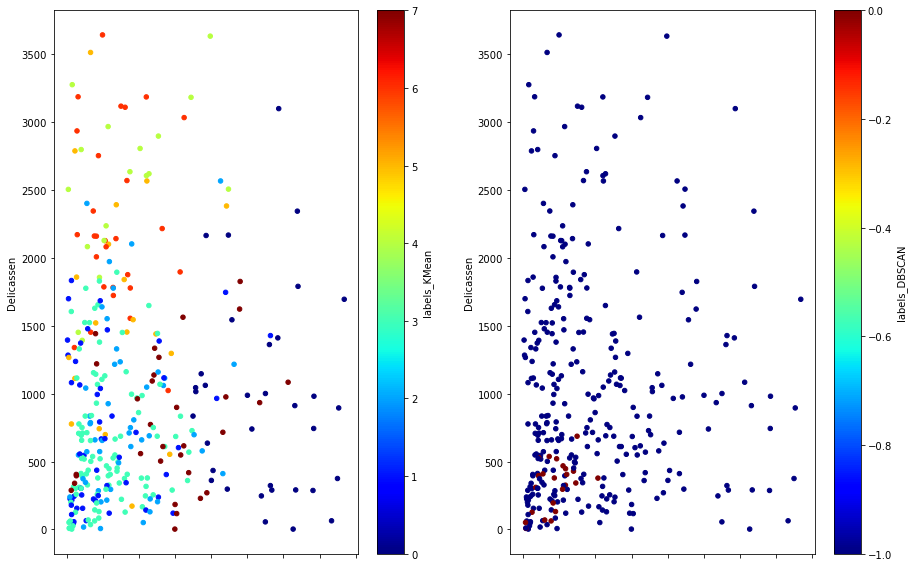

In [25]:
f, axes = plt.subplots(1, 2, figsize=(15, 10), sharex=True)
df.plot.scatter(x='Frozen',y='Delicassen',c='labels_KMean',colormap='jet',ax=axes[0])
df.plot.scatter(x='Frozen',y='Delicassen',c='labels_DBSCAN',colormap='jet',ax=axes[1])

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

<AxesSubplot:xlabel='Frozen', ylabel='Delicassen'>

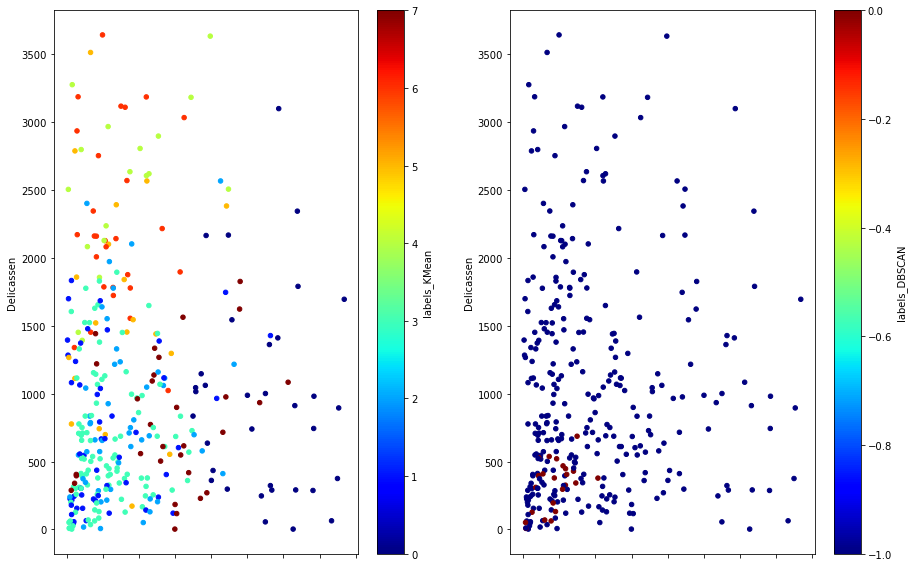

In [26]:
f, axes = plt.subplots(1, 2, figsize=(15, 10), sharex=True)
df.plot.scatter(x='Frozen',y='Delicassen',c='labels_KMean',colormap='jet',ax=axes[0])
df.plot.scatter(x='Frozen',y='Delicassen',c='labels_DBSCAN',colormap='jet',ax=axes[1])


Which algorithm appears to perform better?

In [ ]:
#KMeans seems to perform better on this dataset

# Challenge 6 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

AttributeError: 'PathCollection' object has no property 'figsize'

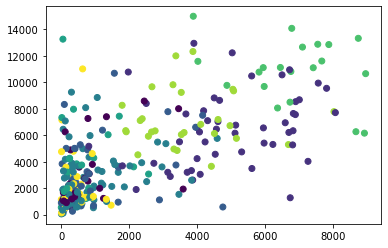

In [28]:
from sklearn.datasets import make_blobs
kmeans = KMeans(n_clusters=5)
kmeans.fit(customers_scale) 

centroids = kmeans.cluster_centers_


plt.scatter(df['Detergents_Paper'], df['Milk'], c= df['labels_KMean'])
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=50, figsize=(30,30))
plt.show()

In [ ]:
# Your comment here

# Challenge 7 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

In [ ]:
# Your comment here